## A1.6 Regresión no lineal

**1. Importa los datos del archivo “Tiempo de entrega.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Genera una gráfica de dispersión que muestre el comportamiento de los datos. Agrega una línea de texto en la que generes una predicción sobre qué tipo de algoritmo será el más adecuado para resolver la tarea (no hay respuestas correctas).**

**i. NOTA: Si te encuentras con algo “raro”, te recomiendo que abras el archivo csv en Excel o alguna herramienta similar y revises qué podría estar causando el error. Cuando lo encuentres, toma alguna acción al respecto para solucionar el problema, e indica en la celda de la libreta la acción que tomaste y el por qué. No se evaluará la acción realizada, pero servirá para discusión en clase.**

Antes de importar la base de datos, es necesario tomar una acción, ya que hay datos en el archivo que no deberían pertenecer a una variable numérica, pero que, debido a un error en el registro, podrían causar problemas al trabajar con el archivo. Por lo tanto, estos datos, que representan 4 de 432 registros, se eliminarán para facilitar el manejo de la base de datos.

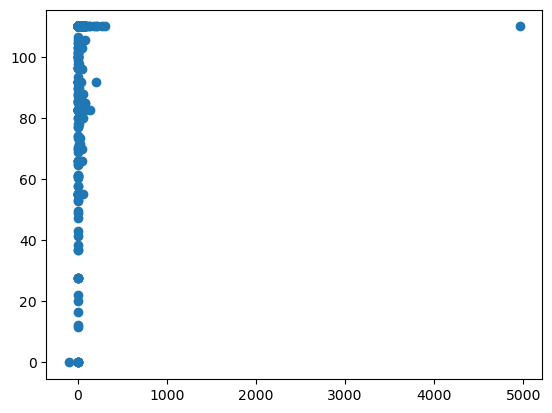

<Figure size 2000x1000 with 0 Axes>

In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar los datos del archivo A1.3 NASA.csv
data = pd.read_csv('A1.6 Tiempo de Entrega.csv')

# Generar grafico de dispersión
x = data['Tiempo']
y = data['Calificacion']
plt.scatter(x, y)
plt.figure(figsize=(20,10))
plt.show()

Es difícil predecir qué modelo sería el más adecuado, ya que la gráfica no muestra una tendencia clara. Sin embargo, parece que las personas que entregan sus tareas antes tienden a obtener una calificación más alta. Por lo tanto, considero que un modelo de regresión lineal podría ser el más adecuado.

**2. Separa los datos en entrenamiento y prueba, con una relación de 70/30. Imprime en consola el promedio de los tiempos en el conjunto de entrenamiento y en el conjunto de prueba. Haz lo mismo para las calificaciones. Incluye una línea de texto donde comentes sobre la similitud o diferencia de los valores promedio entre el conjunto de entrenamiento y el de validación, y cómo es que esto podría afectar al análisis.**

In [47]:
# Separar las variables independientes y dependiente
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Imprimir promedio de las variables x
print("Tiempo promedio de datos de entrenamiento: ", x_train.mean())
print("Tiempo promedio de datos de prueba: ", x_test.mean())

# Imprimir promedio de las variables y
print("\nCalificación promedio de datos de entrenamiento: ", y_train.mean())
print("Calificación promedio de datos de prueba: ", y_test.mean())

Tiempo promedio de datos de entrenamiento:  34.10662411720067
Tiempo promedio de datos de prueba:  17.593873815906974

Calificación promedio de datos de entrenamiento:  95.25420210702342
Calificación promedio de datos de prueba:  93.68683682170543


Se puede deducir, a partir de los resultados de los promedios de tiempo y la gráfica de dispersión previa, que hay un dato que podría afectar el análisis de nuestro modelo. En este caso, afectaría a la generación del modelo, ya que el promedio de tiempo en los datos de entrenamiento es el doble que en los datos de prueba. Esto podría causar que el modelo no sea capaz de generalizar correctamente, ya que los datos de entrenamiento no representan adecuadamente a los datos de prueba.

Por otro lado, los promedios de las calificaciones son similares, lo que indica que los datos y su distribución parecen estar correctos.

**3. Entrena un modelo de regresión polinomial usando los datos de entrenamiento; puedes usar el orden de polinomial que consideres más adecuado. Imprime un resumen de los resultados obtenidos y agrega una línea de texto en la que comentes sobre el tipo de relación (positiva o negativa; ¿a menor tiempo menor calificación?) entre el término lineal y la respuesta, lo que esto significa y si dicha variable está significativamente asociada con las calificaciones.**


In [48]:
# Generar modelo de regresion polinomial de grado 5
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

xtemp_train = x_train.array.reshape(-1,1)
xtemp_test = x_test.array.reshape(-1,1)
polyq_train = PolynomialFeatures(degree=3).fit(xtemp_train)
polyq_test = PolynomialFeatures(degree=3).fit(xtemp_test)
xq_train = pd.DataFrame(polyq_train.transform(xtemp_train))
xq_test = pd.DataFrame(polyq_test.transform(xtemp_test))
mq = sm.OLS(list(y_train),xq_train).fit()
print(mq.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.234
Date:                Wed, 12 Feb 2025   Prob (F-statistic):             0.0227
Time:                        18:08:25   Log-Likelihood:                -1362.6
No. Observations:                 299   AIC:                             2733.
Df Residuals:                     295   BIC:                             2748.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             92.0756      1.706     53.984      0.0

Se generó un modelo de regresión polinomial de tercer grado, ya que los puntos en la gráfica mostraban cierta relación positiva y poca dispersión.  

Con base en los resultados obtenidos del resumen, podemos decir que el modelo presenta una relación positiva, indicando que, a medida que aumenta el tiempo, la calificación tiende a mejorar, dado que el coeficiente de la variable de grado 3 es positivo.  

Además, se observa que el término lineal también es positivo y que todas las variables utilizadas son significativas, con un p-value menor a 0.05.

**4. Entrena un modelo de regresión segmentada, siguiendo la misma estrategia utilizada en la lectura interactiva, utilizando regresiones cuadráticas para cada segmento. Genera estimaciones (predicciones) en los datos de validación. Asegúrate de usar la función descrita en la lectura interactiva, instalándola en tu ambiente de trabajo en caso de no haberlo hecho previamente.**

In [49]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# número de segmentos (clusters)
n_segments = 3

# Aplicar KMeans en x_train
kmeans = KMeans(n_clusters=n_segments, random_state=42, n_init=10)
train_segments = kmeans.fit_predict(xtemp_train)

# Entrenar un modelo de regresión cuadrática en cada segmento
models = {}
for segment in range(n_segments):
    # Filtrar los datos por segmento
    segment_mask = (train_segments == segment)
    X_segment = xtemp_train[segment_mask]
    y_segment = y_train[segment_mask]

    # Transformar X con polinomios de grado 2
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_segment)

    # Ajustar modelo de regresión cuadrática
    model = LinearRegression()
    model.fit(X_poly, y_segment)

    # Guardar modelo y transformador
    models[segment] = (model, poly)

# Predicciones en x_test
test_segments = kmeans.predict(xtemp_test)  # Asignar segmentos a los datos de prueba
y_pred_seg = np.zeros(xtemp_test.shape[0])

xtemp_test = np.asarray(xtemp_test)  # Convertir a ndarray

for i, x in enumerate(xtemp_test.squeeze()):
    segment = test_segments[i]  # Obtener segmento
    model, poly = models[segment]  # Obtener modelo del segmento

    # Transformar y predecir
    X_poly_test = poly.transform([[x]])
    y_pred_seg[i] = model.predict(X_poly_test)[0]


c:\Users\Matthieu\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Aunque esta la libreria de mlinsights, no se logro que funionara en mi entorno de trabajo, por lo que se hizo un trabajo manual para generar el modelo de regresión segmentada con ChatGPT.

**5. Entrena un modelo KNN para regresión utilizando el valor de k que consideres adecuado (o prueba con varios). Genera estimaciones en los datos de validación.**

In [50]:
from sklearn.neighbors import KNeighborsRegressor as KNN
mk = KNN(n_neighbors=15).fit(xtemp_train,y_train)

ypred_mk = mk.predict(xtemp_test)

**6. Calcula el RSE en los datos de prueba para los 3 modelos y agrega una línea de texto donde comentes sobre sus diferencias y si hay un claro “ganador”. No te bases exclusivamente en el error, puedes considerar también aspectos como la interpretabilidad del modelo.**

In [51]:
#  Calcular el RSE de los 3 modelos
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

rse_mq = sqrt(mse(y_test,mq.predict(xq_test)))
rse_seg = sqrt(mse(y_test,y_pred_seg))
rse_mk = sqrt(mse(y_test,ypred_mk))

# Imprimir los RSE
print("RSE Modelo de regresión polinomial: ", rse_mq)
print("RSE Modelo de segmentación: ", rse_seg)
print("RSE Modelo de KNN: ", rse_mk)



RSE Modelo de regresión polinomial:  23.719853564509023
RSE Modelo de segmentación:  30.207893645217936
RSE Modelo de KNN:  22.697390891437244


Consideraría, en base a los resultados obtenidos, que el modelo de regresión polinomial es el mejor, ya que tiene uno de los menores RSE, muy cercano al más bajo del modelo de KNN, y es el más interpretable de los tres modelos en este caso, ya que se puede observar la relación entre las variables de manera clara.

**7. Para los datos de prueba, grafica tanto las calificaciones reales como las predichas por los 3 modelos en un mismo plot, asegurándote de utilizar etiquetas, colores y/o distintos marcadores para diferenciar y describir a cada modelo.**

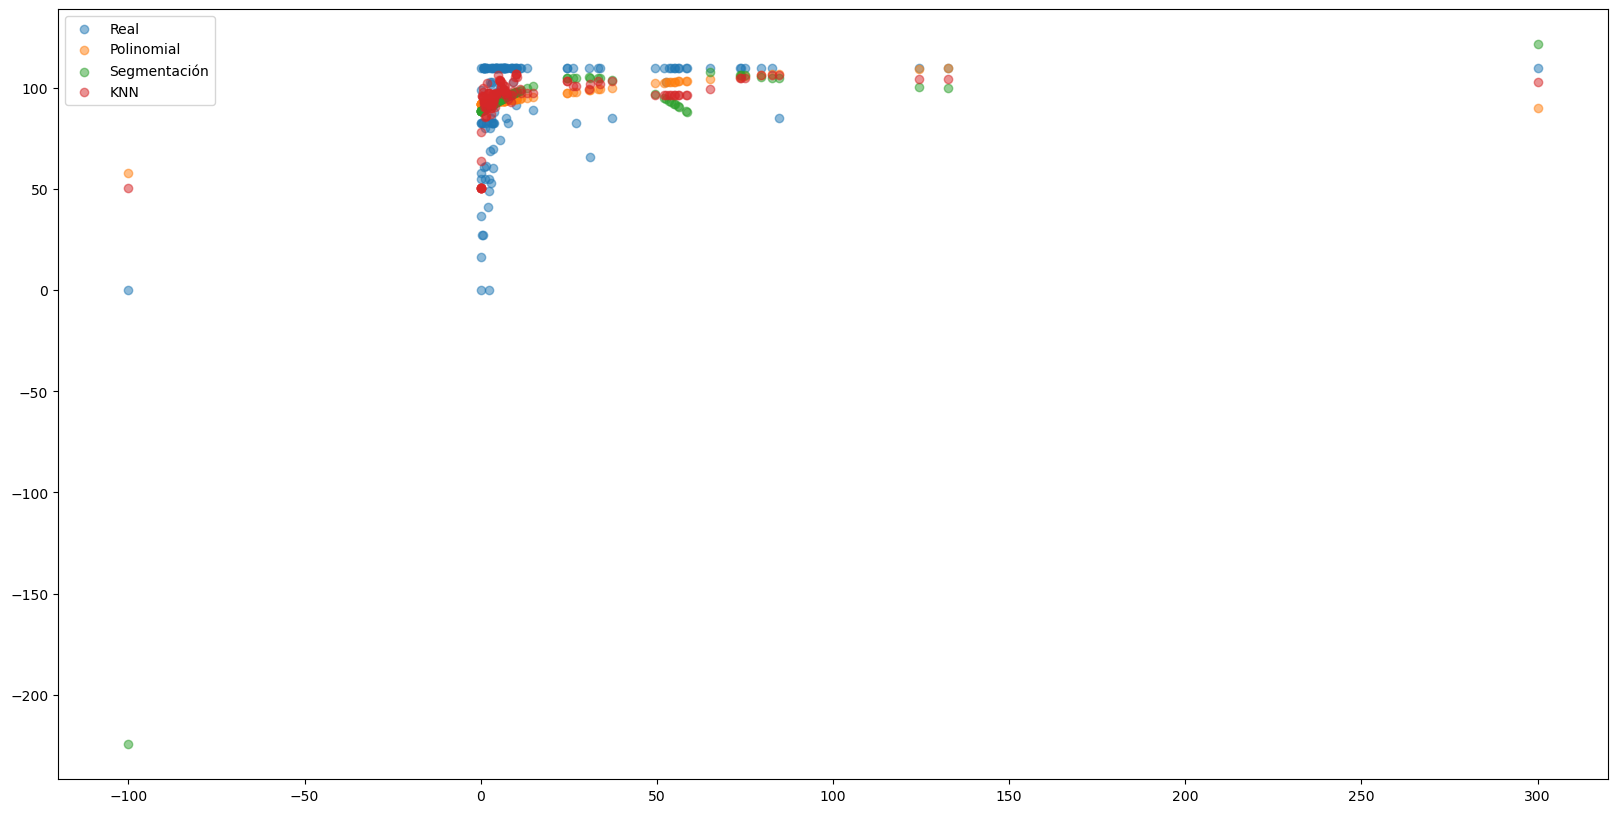

In [52]:
# graficar las calificaciones reales y las predichas por los 3 modelos
plt.figure(figsize=(20,10))
plt.scatter(xtemp_test, y_test, label='Real', alpha=0.5)
plt.scatter(xtemp_test, mq.predict(xq_test), label='Polinomial', alpha=0.5)
plt.scatter(xtemp_test, y_pred_seg, label='Segmentación', alpha=0.5)
plt.scatter(xtemp_test, ypred_mk, label='KNN', alpha=0.5)
plt.legend()
plt.show()


Podemos observar que el modelo de regresión polinomial es el que mejor se ajusta a los datos típicos, ya que las predicciones se encuentran más cerca de los valores reales. Sin embargo, el modelo KNN también se ajusta bastante bien a los datos y no tiene tantos problemas con los valores extremos.

**Firma de honor:**  "Doy mi palabra que he realizado esta actividad con integridad académica" - Daniel Matthieu Potes Lesoinne #584678